# Fake News

## About the data

### 1.id: unique id for a news article
### 2.title: the title of the news article
### 3.author: author of the news article
### 4.text: the text of the article; could be incomplete
### 5.label: a label that marks whether the news article is real or fake

#### 1 => fake news
#### 0 => real news

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve

In [2]:
# Printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Data Preparation

In [3]:
# load the data
df = pd.read_csv('train.csv')
print(f"The shape of the dataset is: {df.shape}")
df.head()

The shape of the dataset is: (20800, 5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

## Data Preprocessing

### Handling null values

In [6]:
df.fillna(" ", inplace= True)

In [7]:
df['content'] = df['title'] + " " + df['author']

In [8]:
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


## Stemming

### Stemming is the process of reducing a word to its base or root form, by removing suffixes and prefixes

In [9]:
port_stem = PorterStemmer()

In [10]:
def stemming(content):
    #replace any non-alphabetic characters in the content variable with a space character
    stemmed_content= re.sub('[^a-zA-Z]',' ',content)
    #Convert all words into lower case letters
    stemmed_content = stemmed_content.lower() 
    # Split the words into list
    stemmed_content = stemmed_content.split()
    #generate a list of stemmed words from stemmed_content, excluding any stop words from the list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    #Join the elements from the list 'stemmed_content' into a single string separated by spaces
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [11]:
df['content']= df['content'].apply(stemming)

In [12]:
df['content']

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan alex ...
20799                            keep f aliv david swanson
Name: content, Length: 20800, dtype: object

## Converting the textual data to numerical data

In [13]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(df['content'].values)
tfidf = transformer.fit_transform(counts)

## Split data into train & test data

In [14]:
targets = df['label'].values

In [15]:
print(f"target shape: {targets.shape}")
print(f"X shape: {tfidf.shape}")

target shape: (20800,)
X shape: (20800, 131551)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, targets, test_size=0.2, random_state=49)

In [17]:
print(f"The shape of X_train is: {X_train.shape[0]}")
print(f"The shape of X_test is: {X_test.shape[0]}")

The shape of X_train is: 16640
The shape of X_test is: 4160


## Iterate

In [18]:
def train(model , model_name):
    model.fit(X_train,y_train)
    print(f"Training accuracy of {model_name} is {model.score(X_train,y_train)}")
    print(f"testing accuracy of {model_name} is {model.score(X_test,y_test)}")
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test
    )
def class_report(model):
    print(classification_report(
        y_test,
        model.predict(X_test)
    ))

## SVM

In [19]:
svc_model= SVC()

In [20]:
train(svc_model, 'SVM')

Training accuracy of SVM is 0.9996995192307693
testing accuracy of SVM is 0.9848557692307692


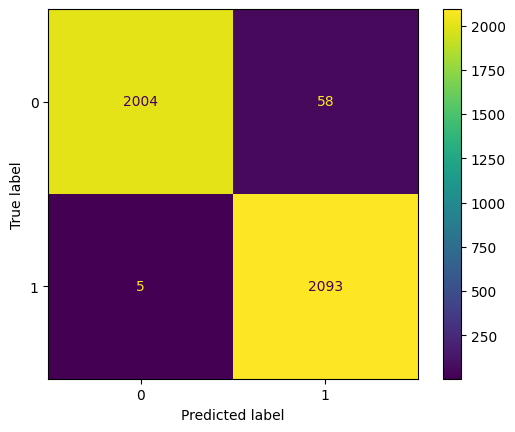

In [21]:
conf_matrix(svc_model)

In [22]:
class_report(svc_model)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2062
           1       0.97      1.00      0.99      2098

    accuracy                           0.98      4160
   macro avg       0.99      0.98      0.98      4160
weighted avg       0.99      0.98      0.98      4160



## DecisionTreeClassifier

In [23]:
depth_num= range(50, 71, 2)
training_acc= []
testing_acc = []
for depth in depth_num:
    tree_model = DecisionTreeClassifier(max_depth=depth,random_state=42)
    tree_model.fit(X_train,y_train)
    training_acc.append(tree_model.score(X_train,y_train))
    testing_acc.append(tree_model.score(X_test,y_test))

In [24]:
print("Training Accuracy Scores:", training_acc[:3])
print("testing Accuracy Scores:", testing_acc[:3])

Training Accuracy Scores: [0.99609375, 0.9965144230769231, 0.996875]
testing Accuracy Scores: [0.9915865384615384, 0.9918269230769231, 0.9944711538461538]


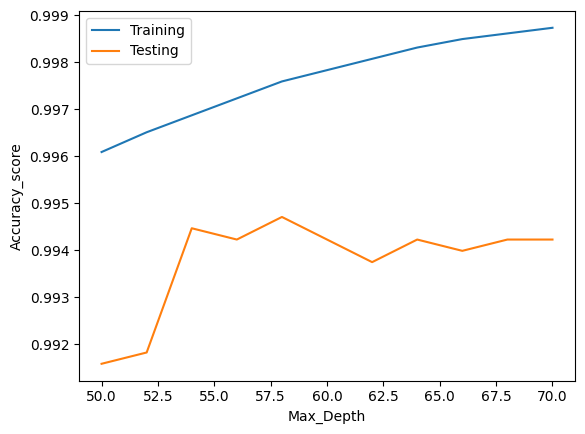

In [25]:
plt.plot(depth_num , training_acc , label= 'Training')
plt.plot(depth_num , testing_acc , label= 'Testing')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy_score')
plt.legend();

In [26]:
# final model
tree_final_model=DecisionTreeClassifier(max_depth=58,random_state=42)
tree_final_model.fit(X_train,y_train)
tree_training_acc = tree_final_model.score(X_train,y_train)
tree_testing_acc = tree_final_model.score(X_test,y_test)
print(f"Training accuracy of DesicionTreeClassifier is {tree_training_acc}")
print(f"testing accuracy of DesicionTreeClassifier is {tree_testing_acc}")

Training accuracy of DesicionTreeClassifier is 0.9975961538461539
testing accuracy of DesicionTreeClassifier is 0.9947115384615385


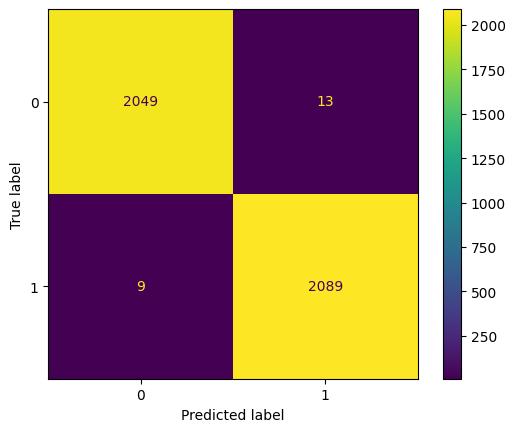

In [27]:
conf_matrix(tree_final_model)

In [28]:
class_report(tree_final_model)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2062
           1       0.99      1.00      0.99      2098

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



## DecisionTreeClassifier got the highest accuracy

In [29]:
# load test data
test_df = pd.read_csv('test.csv')
print(f"The shape of the dataset is: {test_df.shape}")
test_df.head()

The shape of the dataset is: (5200, 4)


,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [30]:
# use the same preprocessing steps
test_df.fillna(" ", inplace= True)
test_df['content'] = test_df['title'] + " " + test_df['author']
test_df['content']= test_df['content'].apply(stemming)
test_df['content']

# transform the test data
test_counts = count_vectorizer.transform(test_df['content'].values)
test_tfidf = transformer.transform(test_counts)

# predict the test data using decision tree
test_df['label'] = tree_final_model.predict(test_tfidf)

test_df.head()


,id,title,author,text,content,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",specter trump loosen tongu purs string silicon...,0
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warship readi strike terrorist near al...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,nodapl nativ american leader vow stay winter f...,1
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",tim tebow attempt anoth comeback time basebal ...,0
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,keiser report meme war e truth broadcast network,1


## Implementation

In [31]:
# input title and author
title = input("Enter the title: ")
author = input("Enter the author: ")

# preprocess the input
content = title + " " + author
content = stemming(content)

# transform the input
content_counts = count_vectorizer.transform([content])
content_tfidf = transformer.transform(content_counts)

# predict the input
label = svc_model.predict(content_tfidf)

# print the prediction
if label[0] == 0:
    print("The news is REAL")
else:
    print("The news is FAKE")

The news is REAL
